## Card Classification Package Testing 

### Setup and Imports

In [6]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms

In [7]:
from src.models.simple_card_classifier import SimpleCardClassifer
from src.models.train import load_model
from src.models.evaluate import preprocess_image, predict, visualize_predictions
from src.data.load_data import load_data

In [8]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


### Load the Trained Model

In [ ]:
model = SimpleCardClassifer(num_classes=53)
save_path = "models/saved_model/card_classifier.pth"
load_model(model, save_path, device)
model.to(device);

### Data Preparation

In [15]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [19]:
# Load class names from the dataset
train_folder = 'data/raw/2/train'
dataset = load_data(train_folder, transform=transform)[1]
class_names = dataset.classes
print("Class names:", class_names)

Class names: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


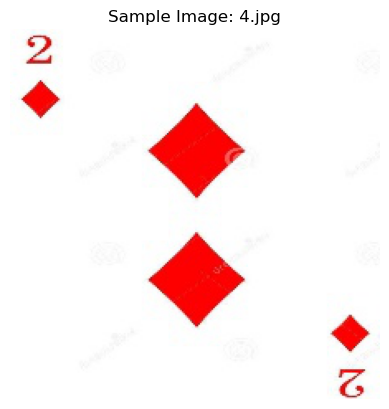

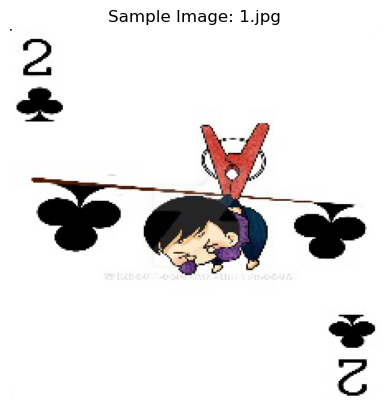

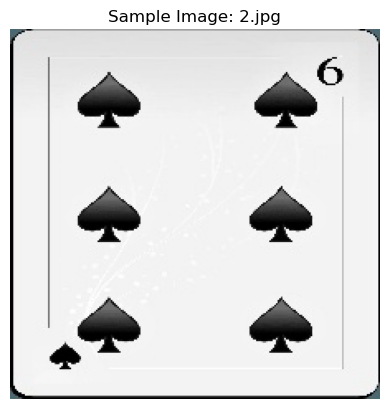

In [24]:
# Visualize some sample images 
test_images = glob('data/raw/2/test/*/*')
sample_images = np.random.choice(test_images, 3, replace=False)

for img_path in sample_images:
    original_image, _ = preprocess_image(img_path, transform)
    plt.imshow(original_image)
    plt.title(f"Sample Image: {os.path.basename(img_path)}")
    plt.axis("off")
    plt.show()

### Running Trained Model to do Predictions on Sample Images

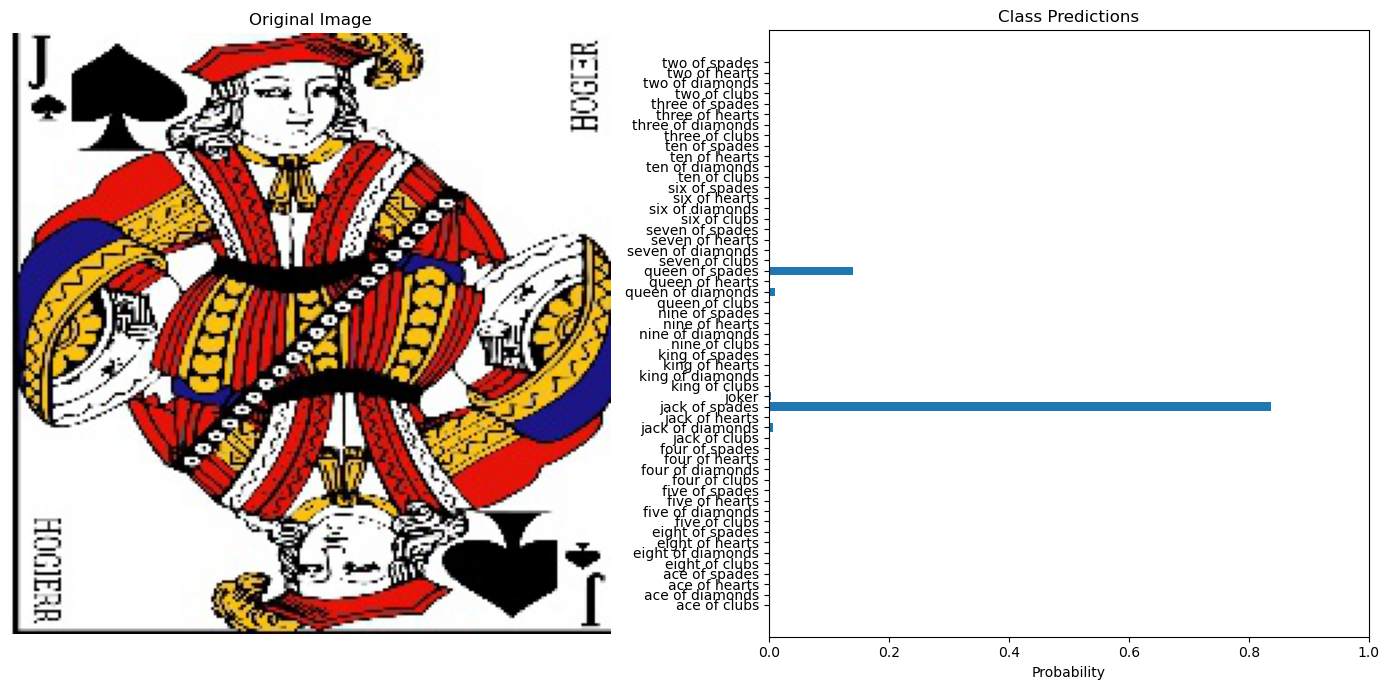

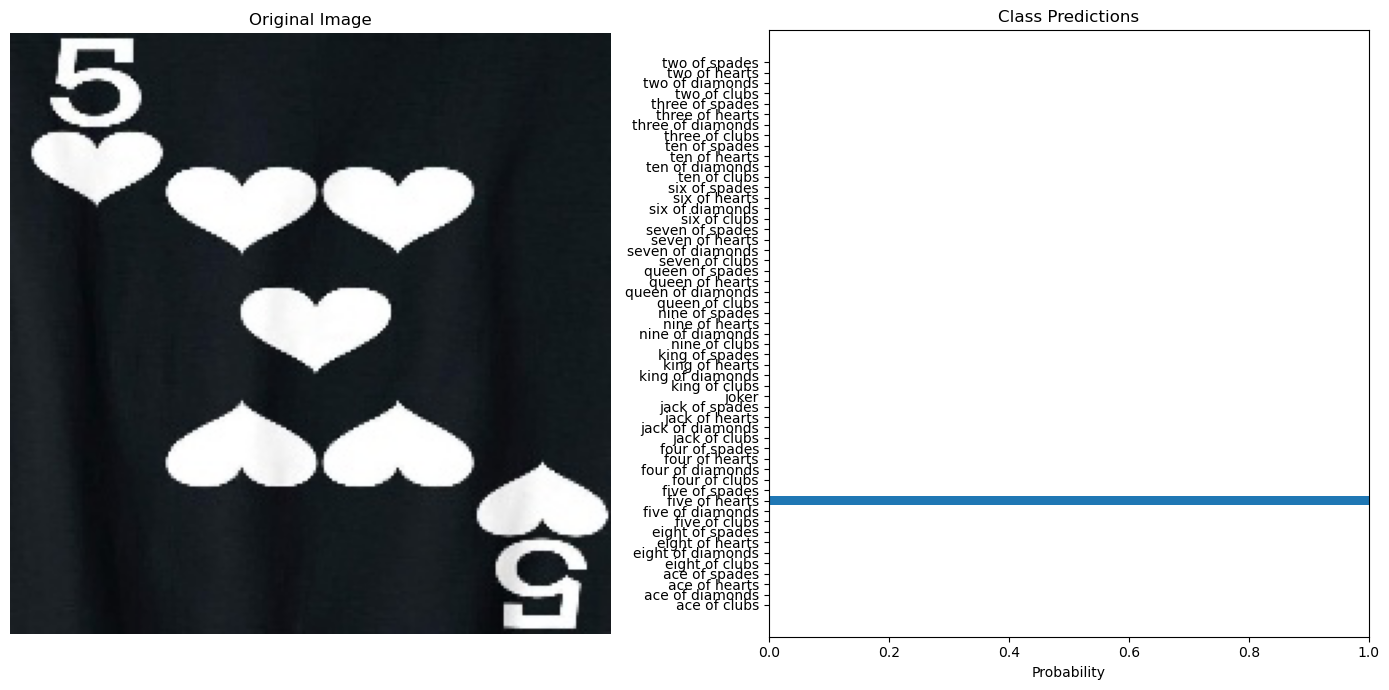

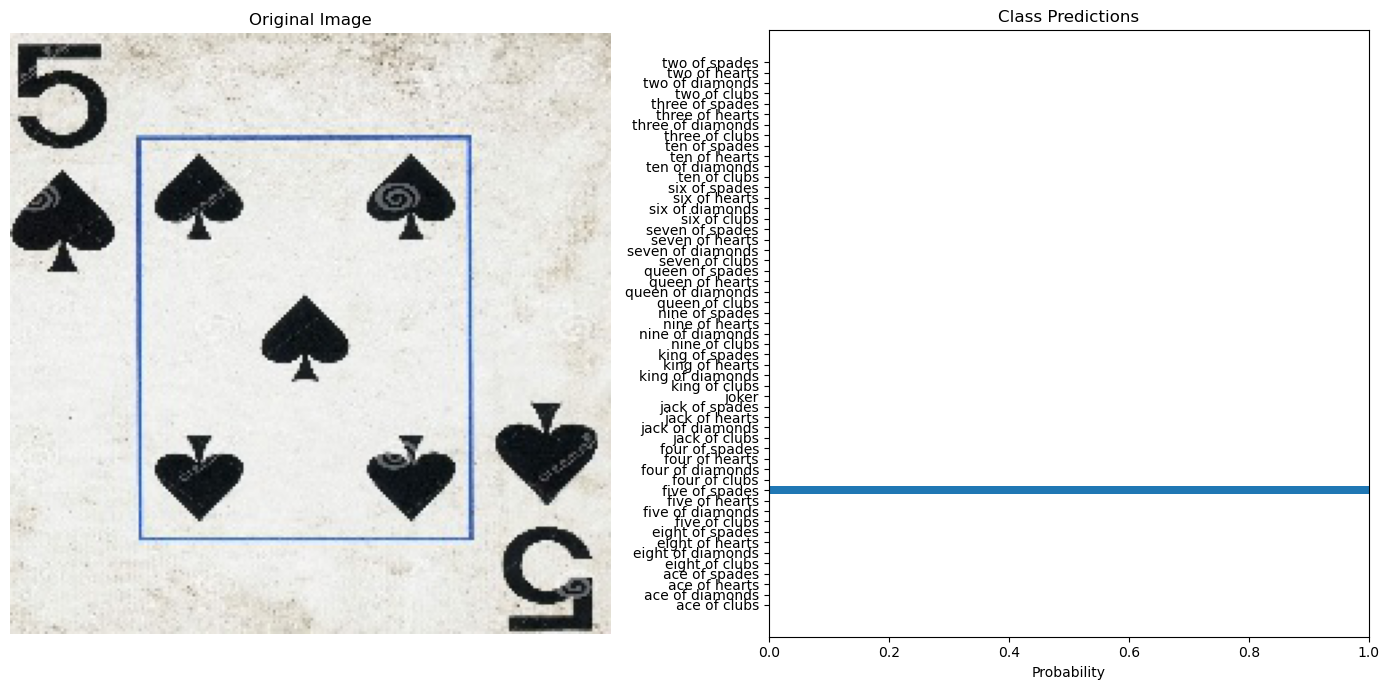

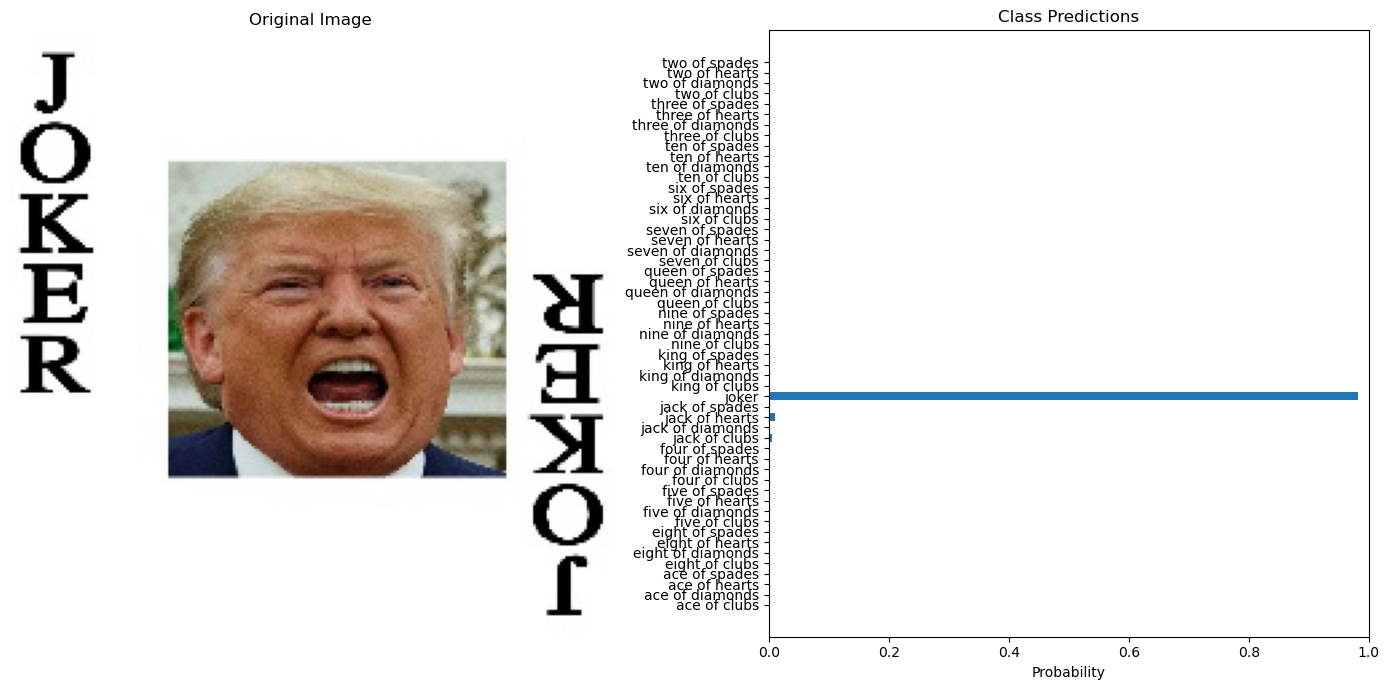

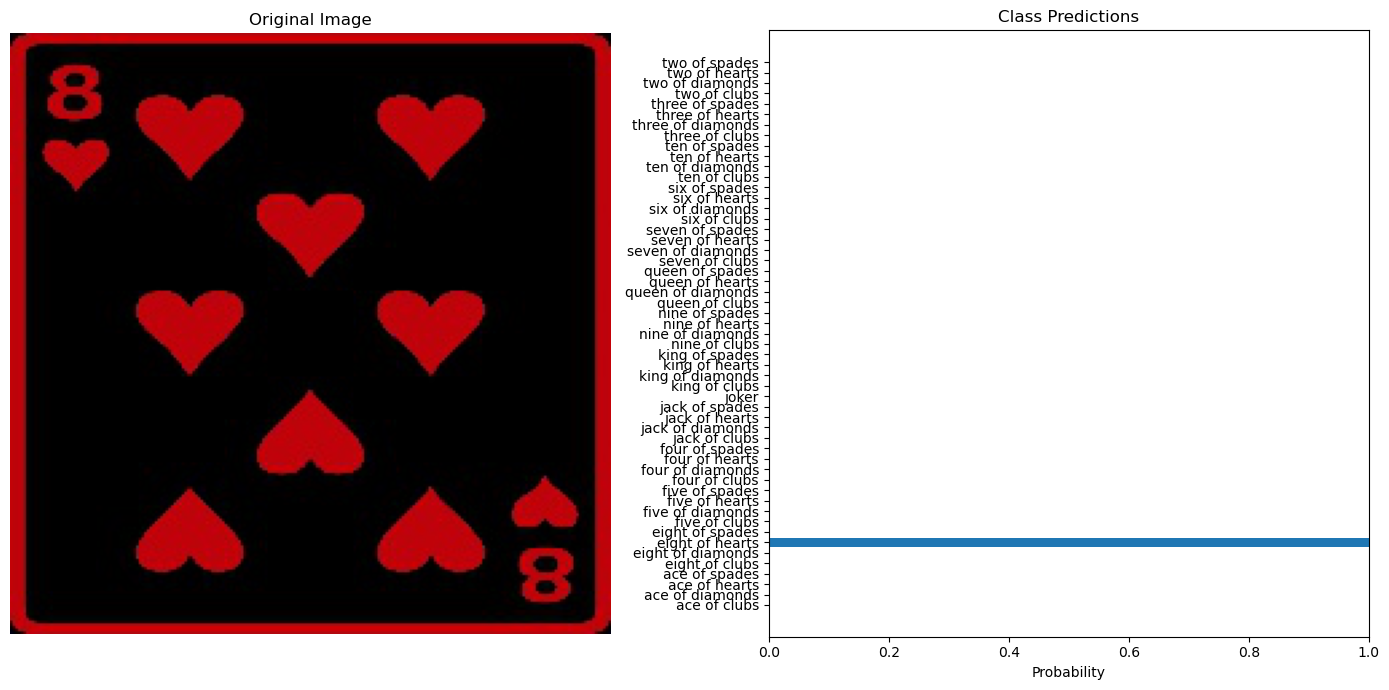

In [25]:
test_examples = np.random.choice(test_images, 5, replace=False)

for example in test_examples:
    original_image, image_tensor = preprocess_image(example, transform)
    probabilities = predict(model, image_tensor, device)
    visualize_predictions(original_image, probabilities, class_names)


In [27]:
sample_image_path = test_images[0]
original_image, image_tensor = preprocess_image(sample_image_path, transform)
print(f"Image tensor shape: {image_tensor.shape}")

Image tensor shape: torch.Size([1, 3, 128, 128])
